# Toroidal Dot Action Space Testing

This notebook allows you to test and explore the toroidal dot environment's action space interactively.

In [1]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from toroidal_dot_interface import ToroidalDotRobot
from config import ToroidalDotConfig

print("Notebook ready for toroidal dot action testing!")

Notebook ready for toroidal dot action testing!


## 1. Create Toroidal Dot Environment

In [2]:
# Create toroidal dot robot interface
try:
    robot = ToroidalDotRobot(
        img_size=ToroidalDotConfig.IMG_SIZE,
        dot_radius=ToroidalDotConfig.DOT_RADIUS,
        move_pixels=ToroidalDotConfig.DOT_MOVE_PIXELS,
        action_delay=ToroidalDotConfig.DOT_ACTION_DELAY,
        seed=42  # Set seed for reproducibility
    )
    print("✅ Toroidal dot environment created")
    print(f"Action space size: {len(robot.action_space)}")
    print(f"Image size: {ToroidalDotConfig.IMG_SIZE}x{ToroidalDotConfig.IMG_SIZE}")
    print(f"Dot radius: {ToroidalDotConfig.DOT_RADIUS} pixels")
    print(f"Movement per action: {ToroidalDotConfig.DOT_MOVE_PIXELS} pixels")
except Exception as e:
    print(f"❌ Failed to create environment: {e}")
    robot = None

✅ Toroidal dot environment created
Action space size: 2
Image size: 224x224
Dot radius: 5 pixels
Movement per action: 27 pixels


## 2. Explore Action Space

In [3]:
if robot:
    print("Available actions:")
    for i, action in enumerate(robot.action_space):
        description = "Stay in place" if action['action'] == 0 else "Move right"
        print(f"  {i}: {action} - {description}")
else:
    print("❌ Robot not created")

Available actions:
  0: {'action': 0} - Stay in place
  1: {'action': 1} - Move right


## 3. Visualize Initial State

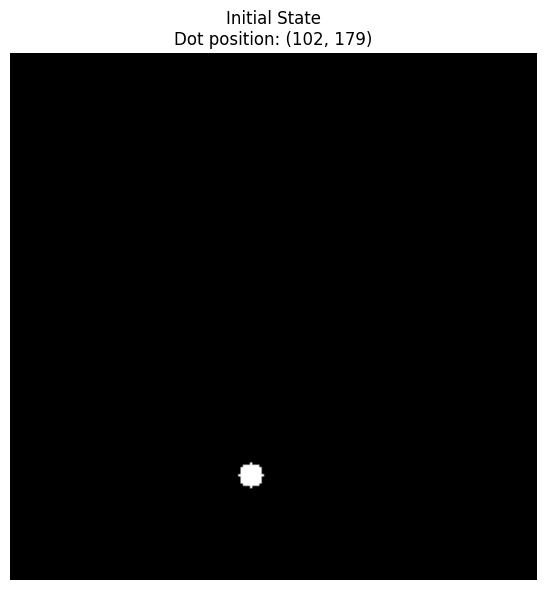

✅ Frame shape: (224, 224, 3), dtype: uint8


In [4]:
def show_observation(frame, title="Current State", show_position=True):
    """Display current observation with optional position info"""
    if frame is None:
        print("❌ No frame to display")
        return
    
    plt.figure(figsize=(6, 6))
    plt.imshow(frame)
    
    if show_position and robot:
        x, y = robot.get_position()
        plt.title(f"{title}\nDot position: ({x}, {y})")
    else:
        plt.title(title)
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

if robot:
    frame = robot.get_observation()
    show_observation(frame, "Initial State")
    print(f"✅ Frame shape: {frame.shape}, dtype: {frame.dtype}")
else:
    print("❌ Robot not created")

## 4. Test Individual Actions

🤖 Executing action 1: {'action': 1} (Move right)
   Position before: (102, 179)
   Position after:  (129, 179)
✅ Action executed successfully


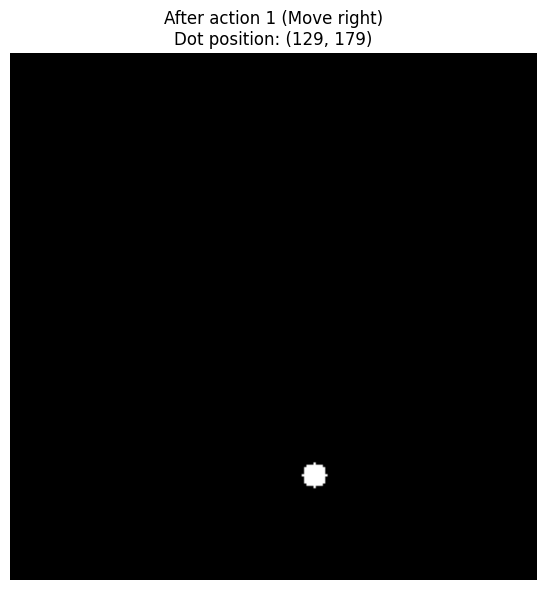

In [5]:
def test_action(action_index, visualize=True):
    """Test a specific action by index"""
    if not robot:
        print("❌ Robot not created")
        return
    
    if action_index < 0 or action_index >= len(robot.action_space):
        print(f"❌ Invalid action index. Must be 0-{len(robot.action_space)-1}")
        return
    
    action = robot.action_space[action_index]
    action_desc = "Stay" if action['action'] == 0 else "Move right"
    print(f"🤖 Executing action {action_index}: {action} ({action_desc})")
    
    # Get position before
    x_before, y_before = robot.get_position()
    print(f"   Position before: ({x_before}, {y_before})")
    
    # Execute action
    robot.execute_action(action)
    
    # Get position after
    x_after, y_after = robot.get_position()
    print(f"   Position after:  ({x_after}, {y_after})")
    
    # Check for wrapping
    if x_after < x_before and action['action'] == 1:
        print("   🔄 Toroidal wrapping occurred!")
    
    print("✅ Action executed successfully")
    
    if visualize:
        frame = robot.get_observation()
        show_observation(frame, f"After action {action_index} ({action_desc})")

# Example: Test action 1 (move right)
test_action(1)

## 5. Test Action 0 (Stay)

🤖 Executing action 0: {'action': 0} (Stay)
   Position before: (129, 179)
   Position after:  (129, 179)
✅ Action executed successfully


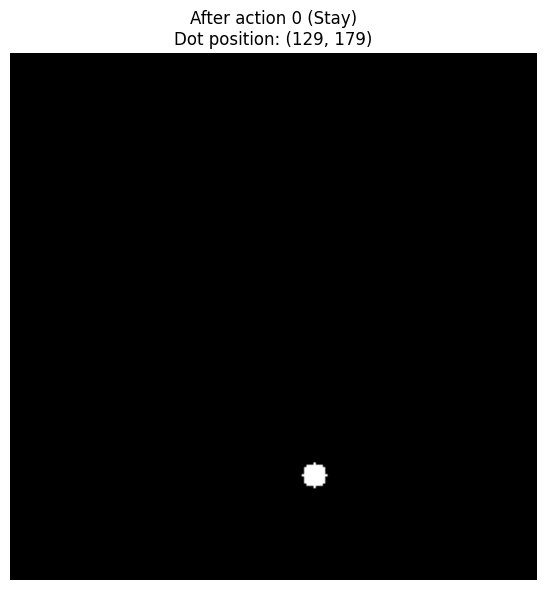

In [6]:
# Test staying in place
test_action(0)

## 6. Action Sequence Test

Execute a sequence of actions and visualize the trajectory.

🤖 Testing sequence of 10 actions...
  Step 1: Action 1 (Move) → Position: (156, 179)
  Step 2: Action 1 (Move) → Position: (183, 179)
  Step 3: Action 1 (Move) → Position: (210, 179)
  Step 4: Action 1 (Move) → Position: (13, 179)
  Step 5: Action 1 (Move) → Position: (40, 179)
  Step 6: Action 0 (Stay) → Position: (40, 179)
  Step 7: Action 0 (Stay) → Position: (40, 179)
  Step 8: Action 1 (Move) → Position: (67, 179)
  Step 9: Action 1 (Move) → Position: (94, 179)
  Step 10: Action 1 (Move) → Position: (121, 179)
✅ Sequence completed


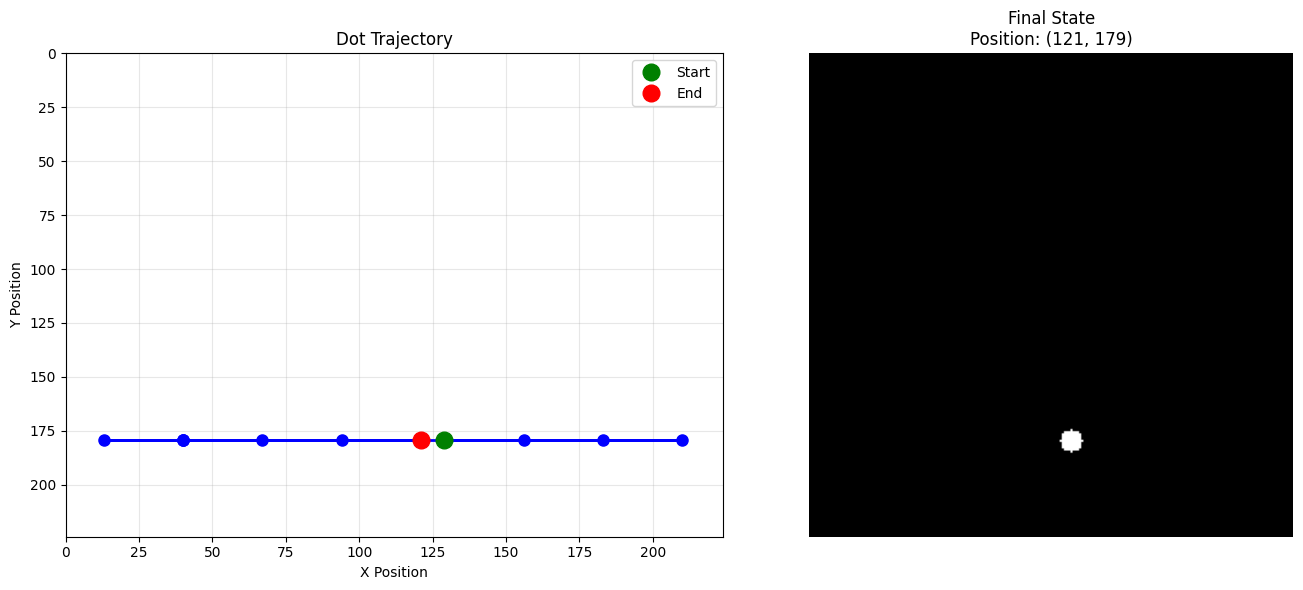

In [7]:
def test_action_sequence(actions, show_trajectory=True):
    """Test a sequence of actions
    
    Args:
        actions: List of action indices (0 or 1)
        show_trajectory: If True, visualize the trajectory
    """
    if not robot:
        print("❌ Robot not created")
        return
    
    print(f"🤖 Testing sequence of {len(actions)} actions...")
    
    positions = []
    frames = []
    
    # Get initial state
    positions.append(robot.get_position())
    frames.append(robot.get_observation())
    
    # Execute actions
    for i, action_idx in enumerate(actions):
        action = robot.action_space[action_idx]
        action_desc = "Stay" if action['action'] == 0 else "Move"
        print(f"  Step {i+1}: Action {action_idx} ({action_desc})", end="")
        
        robot.execute_action(action)
        
        pos = robot.get_position()
        positions.append(pos)
        frames.append(robot.get_observation())
        
        print(f" → Position: {pos}")
    
    print("✅ Sequence completed")
    
    if show_trajectory:
        # Show trajectory plot
        positions_array = np.array(positions)
        
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        # Trajectory plot
        axes[0].plot(positions_array[:, 0], positions_array[:, 1], 'b-o', markersize=8, linewidth=2)
        axes[0].plot(positions_array[0, 0], positions_array[0, 1], 'go', markersize=12, label='Start')
        axes[0].plot(positions_array[-1, 0], positions_array[-1, 1], 'ro', markersize=12, label='End')
        axes[0].set_xlim(0, ToroidalDotConfig.IMG_SIZE)
        axes[0].set_ylim(0, ToroidalDotConfig.IMG_SIZE)
        axes[0].set_xlabel('X Position')
        axes[0].set_ylabel('Y Position')
        axes[0].set_title('Dot Trajectory')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        axes[0].invert_yaxis()  # Match image coordinates
        
        # Final frame
        axes[1].imshow(frames[-1])
        axes[1].set_title(f'Final State\nPosition: {positions[-1]}')
        axes[1].axis('off')
        
        plt.tight_layout()
        plt.show()

# Test sequence: Move right 5 times, stay 2 times, move right 3 times
sequence = [1, 1, 1, 1, 1, 0, 0, 1, 1, 1]
test_action_sequence(sequence)

## 7. Visualize Toroidal Wrapping

Execute many move actions to see the dot wrap around from right edge to left edge.

🤖 Demonstrating toroidal wrapping with 40 move actions...
   Movement per action: 27 pixels
   Image width: 224 pixels
   Expected wraps: 4


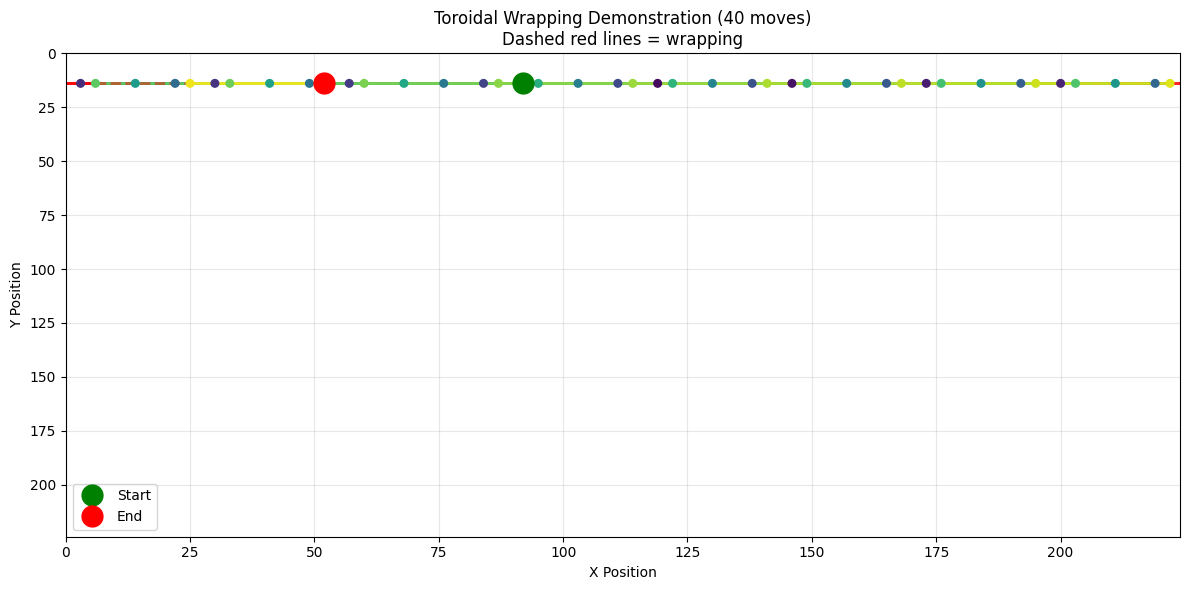

✅ Final position: (52, 14)
   Total distance traveled: 1080 pixels


In [8]:
def demonstrate_wrapping(num_moves=40):
    """Demonstrate toroidal wrapping by moving many times"""
    if not robot:
        print("❌ Robot not created")
        return
    
    # Reset to known position
    robot.reset()
    print(f"🤖 Demonstrating toroidal wrapping with {num_moves} move actions...")
    print(f"   Movement per action: {ToroidalDotConfig.DOT_MOVE_PIXELS} pixels")
    print(f"   Image width: {ToroidalDotConfig.IMG_SIZE} pixels")
    print(f"   Expected wraps: {(num_moves * ToroidalDotConfig.DOT_MOVE_PIXELS) // ToroidalDotConfig.IMG_SIZE}")
    
    positions = [robot.get_position()]
    
    # Execute moves
    for i in range(num_moves):
        robot.execute_action({'action': 1})
        positions.append(robot.get_position())
    
    positions_array = np.array(positions)
    
    # Plot trajectory showing wrapping
    plt.figure(figsize=(12, 6))
    
    # Color by step for better visualization
    colors = plt.cm.viridis(np.linspace(0, 1, len(positions)))
    
    for i in range(len(positions) - 1):
        x1, y1 = positions[i]
        x2, y2 = positions[i + 1]
        
        # Check if wrapping occurred
        if x2 < x1:  # Wrapped around
            # Draw as dashed line to indicate wrap
            plt.plot([x1, ToroidalDotConfig.IMG_SIZE], [y1, y1], 'r--', alpha=0.5, linewidth=2)
            plt.plot([0, x2], [y2, y2], 'r--', alpha=0.5, linewidth=2)
        else:
            plt.plot([x1, x2], [y1, y2], color=colors[i], linewidth=2)
    
    plt.scatter(positions_array[:, 0], positions_array[:, 1], c=colors, s=30, zorder=3)
    plt.plot(positions[0][0], positions[0][1], 'go', markersize=15, label='Start', zorder=4)
    plt.plot(positions[-1][0], positions[-1][1], 'ro', markersize=15, label='End', zorder=4)
    
    plt.xlim(0, ToroidalDotConfig.IMG_SIZE)
    plt.ylim(0, ToroidalDotConfig.IMG_SIZE)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title(f'Toroidal Wrapping Demonstration ({num_moves} moves)\nDashed red lines = wrapping')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.gca().invert_yaxis()  # Match image coordinates
    
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Final position: {positions[-1]}")
    print(f"   Total distance traveled: {num_moves * ToroidalDotConfig.DOT_MOVE_PIXELS} pixels")

demonstrate_wrapping(40)

## 8. Before/After Action Comparison

🤖 Executing action 1: {'action': 1} (Move right)


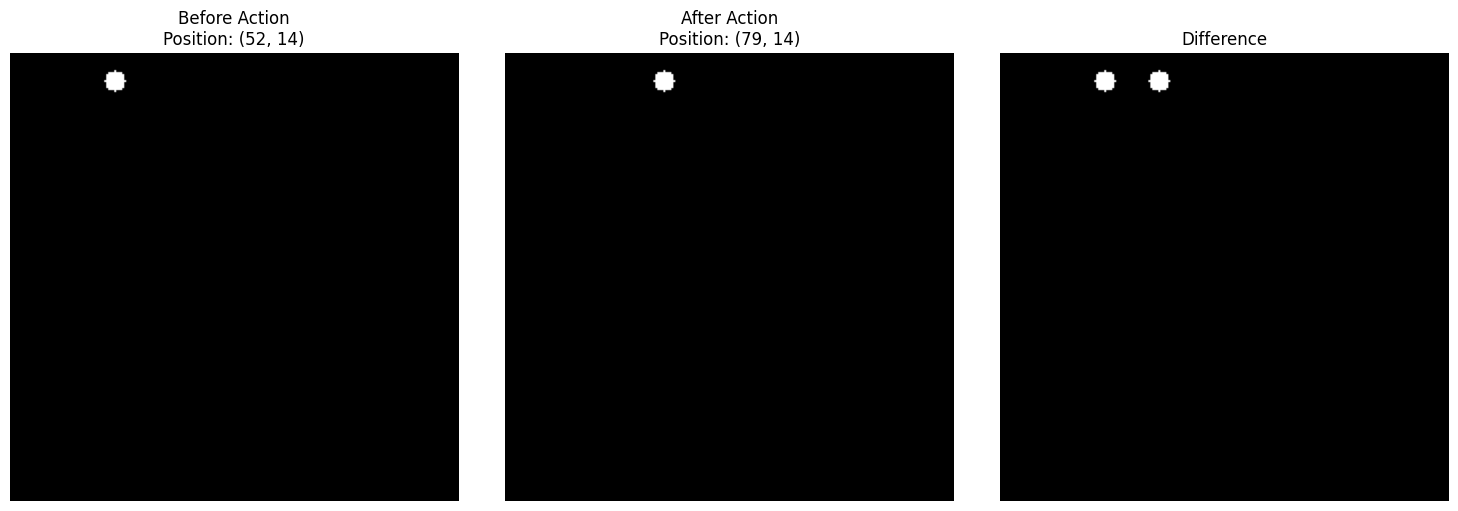

📊 Average pixel difference: 0.82
✅ Action executed: (52, 14) → (79, 14)


In [9]:
def test_action_with_visual(action_index):
    """Test action with before/after visual comparison"""
    if not robot:
        print("❌ Robot not created")
        return
    
    if action_index < 0 or action_index >= len(robot.action_space):
        print(f"❌ Invalid action index. Must be 0-{len(robot.action_space)-1}")
        return
    
    # Capture before
    frame_before = robot.get_observation()
    pos_before = robot.get_position()
    
    # Execute action
    action = robot.action_space[action_index]
    action_desc = "Stay" if action['action'] == 0 else "Move right"
    print(f"🤖 Executing action {action_index}: {action} ({action_desc})")
    robot.execute_action(action)
    
    # Capture after
    frame_after = robot.get_observation()
    pos_after = robot.get_position()
    
    # Display results
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(frame_before)
    axes[0].set_title(f"Before Action\nPosition: {pos_before}")
    axes[0].axis('off')
    
    axes[1].imshow(frame_after)
    axes[1].set_title(f"After Action\nPosition: {pos_after}")
    axes[1].axis('off')
    
    # Difference image
    diff_img = np.abs(frame_after.astype(float) - frame_before.astype(float))
    axes[2].imshow(diff_img / 255.0)
    axes[2].set_title("Difference")
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    avg_diff = np.mean(diff_img)
    print(f"📊 Average pixel difference: {avg_diff:.2f}")
    print(f"✅ Action executed: {pos_before} → {pos_after}")

# Test action 1 (move right) with visual feedback
test_action_with_visual(1)

## 9. Random Action Sequence

🤖 Testing 10 random actions...
  Step 1: Action 0 (Stay) - (79, 14) → (79, 14)
  Step 2: Action 1 (Move) - (79, 14) → (106, 14)
  Step 3: Action 0 (Stay) - (106, 14) → (106, 14)
  Step 4: Action 0 (Stay) - (106, 14) → (106, 14)
  Step 5: Action 0 (Stay) - (106, 14) → (106, 14)
  Step 6: Action 1 (Move) - (106, 14) → (133, 14)
  Step 7: Action 0 (Stay) - (133, 14) → (133, 14)
  Step 8: Action 0 (Stay) - (133, 14) → (133, 14)
  Step 9: Action 0 (Stay) - (133, 14) → (133, 14)
  Step 10: Action 1 (Move) - (133, 14) → (160, 14)

✅ Random sequence completed
   Action 0 (stay): 7 times
   Action 1 (move): 3 times


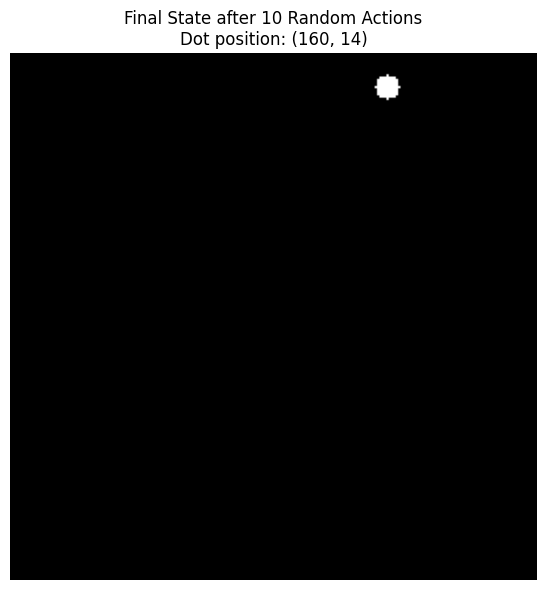

In [10]:
def test_random_sequence(num_steps=10, seed=None):
    """Test a sequence of random actions"""
    if not robot:
        print("❌ Robot not created")
        return
    
    if seed is not None:
        np.random.seed(seed)
    
    print(f"🤖 Testing {num_steps} random actions...")
    
    action_counts = {0: 0, 1: 0}
    
    for step in range(num_steps):
        # Random action
        action_idx = np.random.randint(0, len(robot.action_space))
        action = robot.action_space[action_idx]
        action_counts[action_idx] += 1
        
        pos_before = robot.get_position()
        robot.execute_action(action)
        pos_after = robot.get_position()
        
        action_desc = "Stay" if action['action'] == 0 else "Move"
        print(f"  Step {step + 1}: Action {action_idx} ({action_desc}) - {pos_before} → {pos_after}")
    
    print(f"\n✅ Random sequence completed")
    print(f"   Action 0 (stay): {action_counts[0]} times")
    print(f"   Action 1 (move): {action_counts[1]} times")
    
    # Show final state
    frame = robot.get_observation()
    show_observation(frame, f"Final State after {num_steps} Random Actions")

test_random_sequence(10, seed=42)

## 10. Reset Environment Test

Test that reset creates different random starting positions (both x and y).

🤖 Testing reset randomization with 5 resets...
  Reset 1: Position = (106, 71)
  Reset 2: Position = (188, 20)
  Reset 3: Position = (102, 121)
  Reset 4: Position = (210, 214)
  Reset 5: Position = (74, 202)

✅ Reset test completed
   Unique X positions: 5/5
   Unique Y positions: 5/5


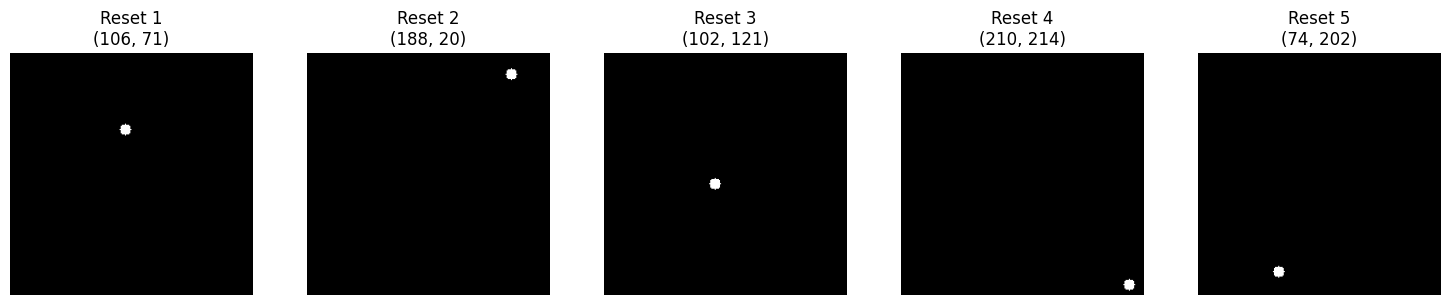

In [11]:
def test_reset_randomization(num_resets=5):
    """Test that reset randomizes both x and y positions"""
    if not robot:
        print("❌ Robot not created")
        return
    
    print(f"🤖 Testing reset randomization with {num_resets} resets...")
    
    positions = []
    frames = []
    
    for i in range(num_resets):
        robot.reset()
        pos = robot.get_position()
        positions.append(pos)
        frames.append(robot.get_observation())
        print(f"  Reset {i + 1}: Position = {pos}")
    
    # Check that both x and y positions vary
    x_positions = [pos[0] for pos in positions]
    y_positions = [pos[1] for pos in positions]
    unique_x = len(set(x_positions))
    unique_y = len(set(y_positions))
    
    print(f"\n✅ Reset test completed")
    print(f"   Unique X positions: {unique_x}/{num_resets}")
    print(f"   Unique Y positions: {unique_y}/{num_resets}")
    
    # Visualize all reset positions
    fig, axes = plt.subplots(1, min(num_resets, 5), figsize=(3 * min(num_resets, 5), 3))
    if num_resets == 1:
        axes = [axes]
    
    for i in range(min(num_resets, 5)):
        axes[i].imshow(frames[i])
        axes[i].set_title(f"Reset {i + 1}\n{positions[i]}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

test_reset_randomization(5)

## 11. Cleanup

In [12]:
if robot:
    robot.cleanup()
    print("✅ Robot cleaned up")
else:
    print("No robot to clean up")

✅ Robot cleaned up


## Usage Examples

Here are some example commands you can run in separate cells:

```python
# Test specific actions
test_action(0)  # Stay in place
test_action(1)  # Move right

# Test with visual feedback
test_action_with_visual(1)  # Move with before/after images

# Test action sequences
test_action_sequence([1, 1, 1, 0, 1, 1])  # Custom sequence

# Demonstrate wrapping
demonstrate_wrapping(50)  # Many moves to show wrapping

# Random actions
test_random_sequence(15, seed=42)  # 15 random actions

# Test reset
test_reset_randomization(10)  # Check x and y randomization
```